In [1]:
import pandas as pd
import numpy as np

In [2]:
my_data = pd.read_csv("my_data_FI.csv")
my_data.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6,ClassID
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142,1
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729,1
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288,1
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023,1
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915,1


In [3]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot as plt
import xgboost as xgb

In [4]:
y=my_data.iloc[:,19]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ClassID, dtype: int64

In [6]:
x=my_data.iloc[:,0:19]
x.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [11]:
model = XGBClassifier()
model.fit(x_train, y_train)
print(x.shape);print(model)

(7547, 19)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [12]:
importance = model.feature_importances_

In [9]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04017
Feature: 1, Score: 0.03372
Feature: 2, Score: 0.02425
Feature: 3, Score: 0.06779
Feature: 4, Score: 0.03869
Feature: 5, Score: 0.03451
Feature: 6, Score: 0.05583
Feature: 7, Score: 0.03041
Feature: 8, Score: 0.03076
Feature: 9, Score: 0.03824
Feature: 10, Score: 0.03728
Feature: 11, Score: 0.03041
Feature: 12, Score: 0.15073
Feature: 13, Score: 0.06121
Feature: 14, Score: 0.05574
Feature: 15, Score: 0.06877
Feature: 16, Score: 0.05613
Feature: 17, Score: 0.06077
Feature: 18, Score: 0.08460


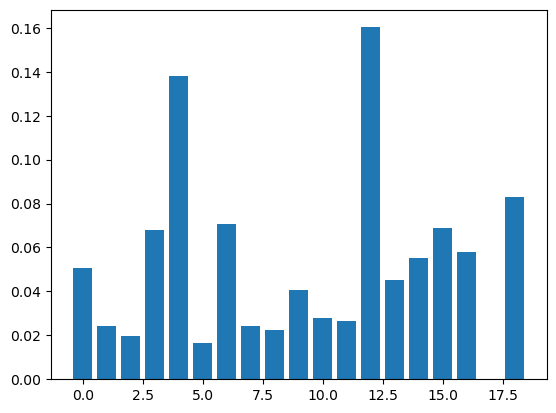

In [15]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [16]:
df=pd.DataFrame(importance,columns=['feature_weights'])
display(df)

,feature_weights
0,0.050893
1,0.024296
2,0.019889
3,0.067742
4,0.138165
5,0.016717
6,0.070655
7,0.024068
8,0.022242
9,0.040642


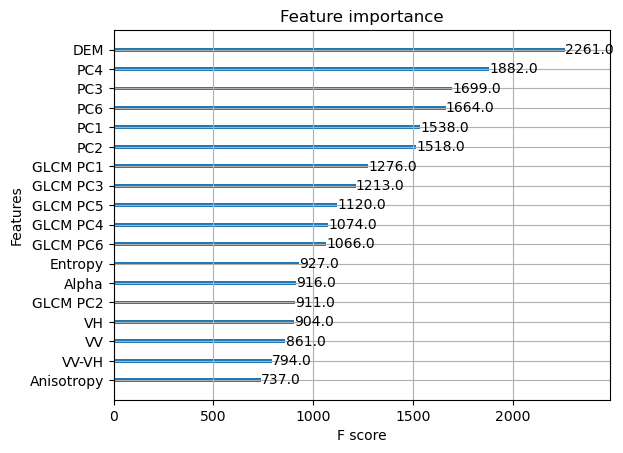

In [17]:
plot_importance(model)
plt.show()